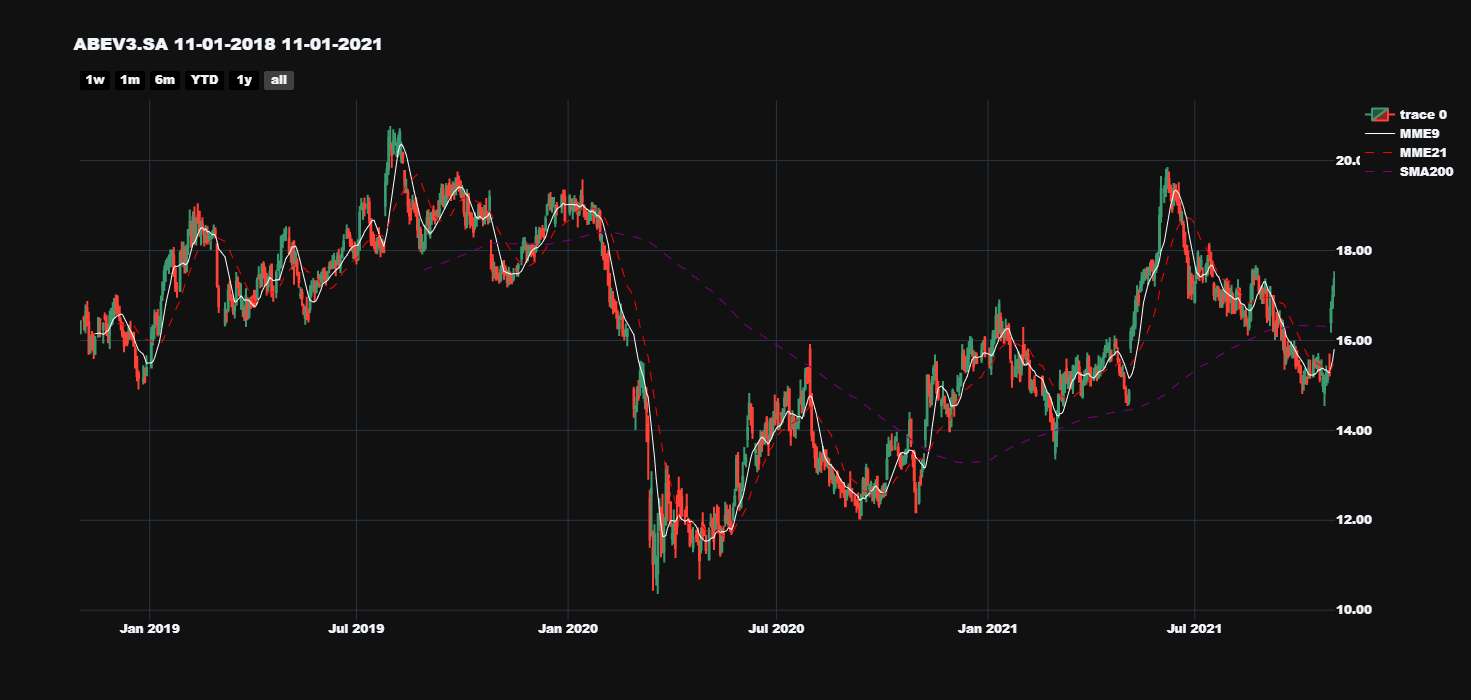

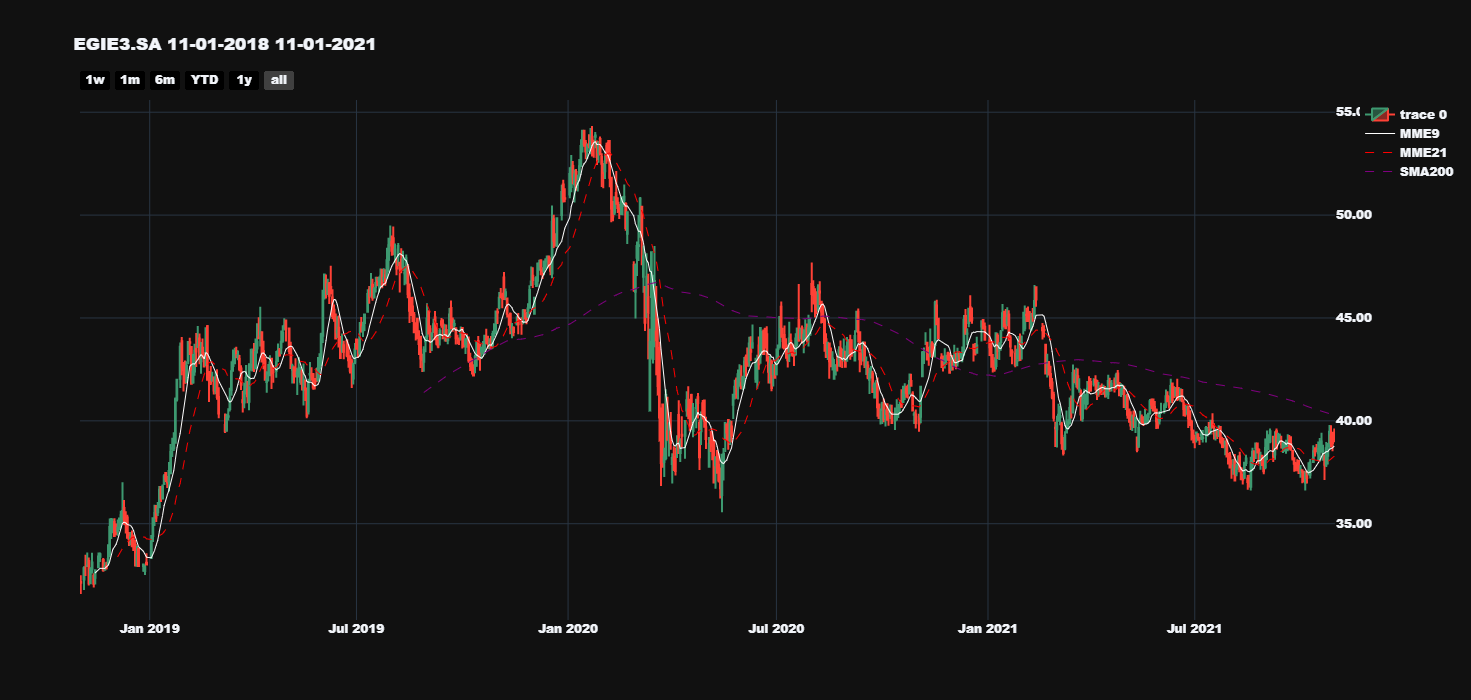

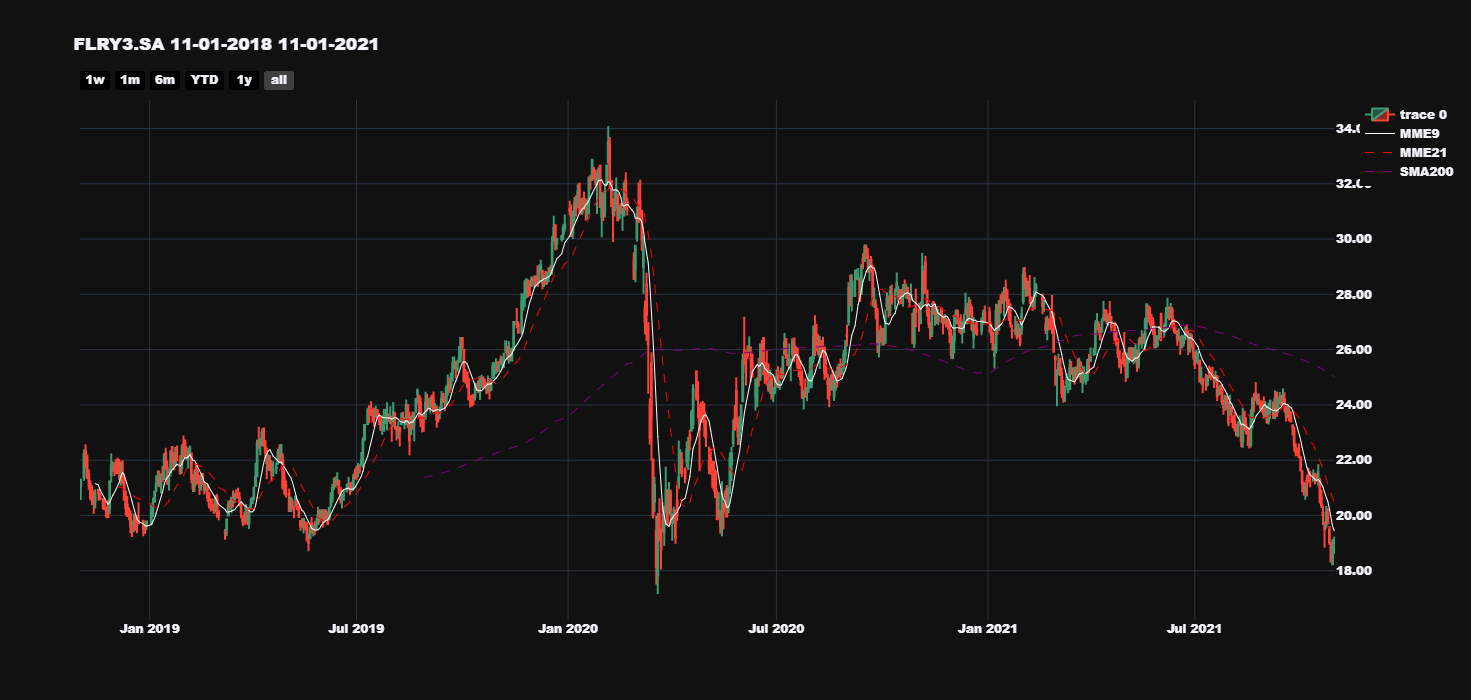

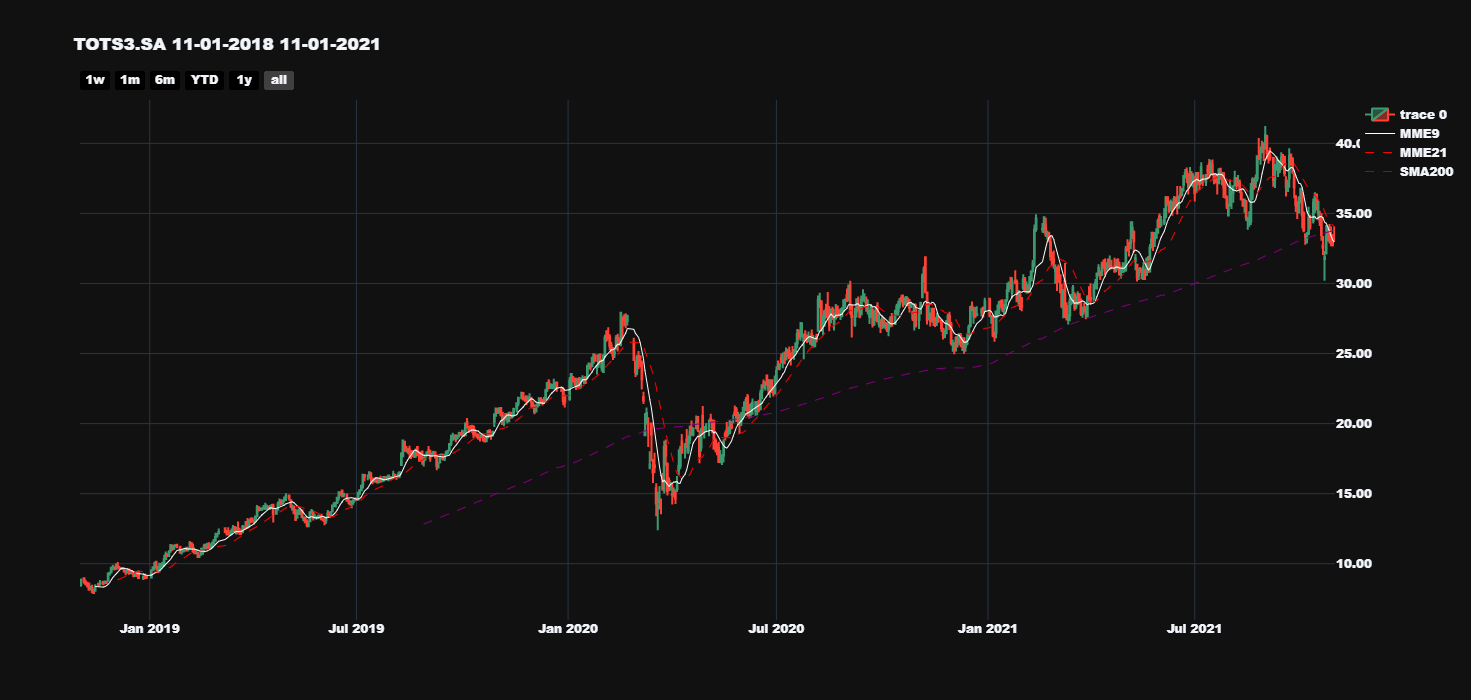

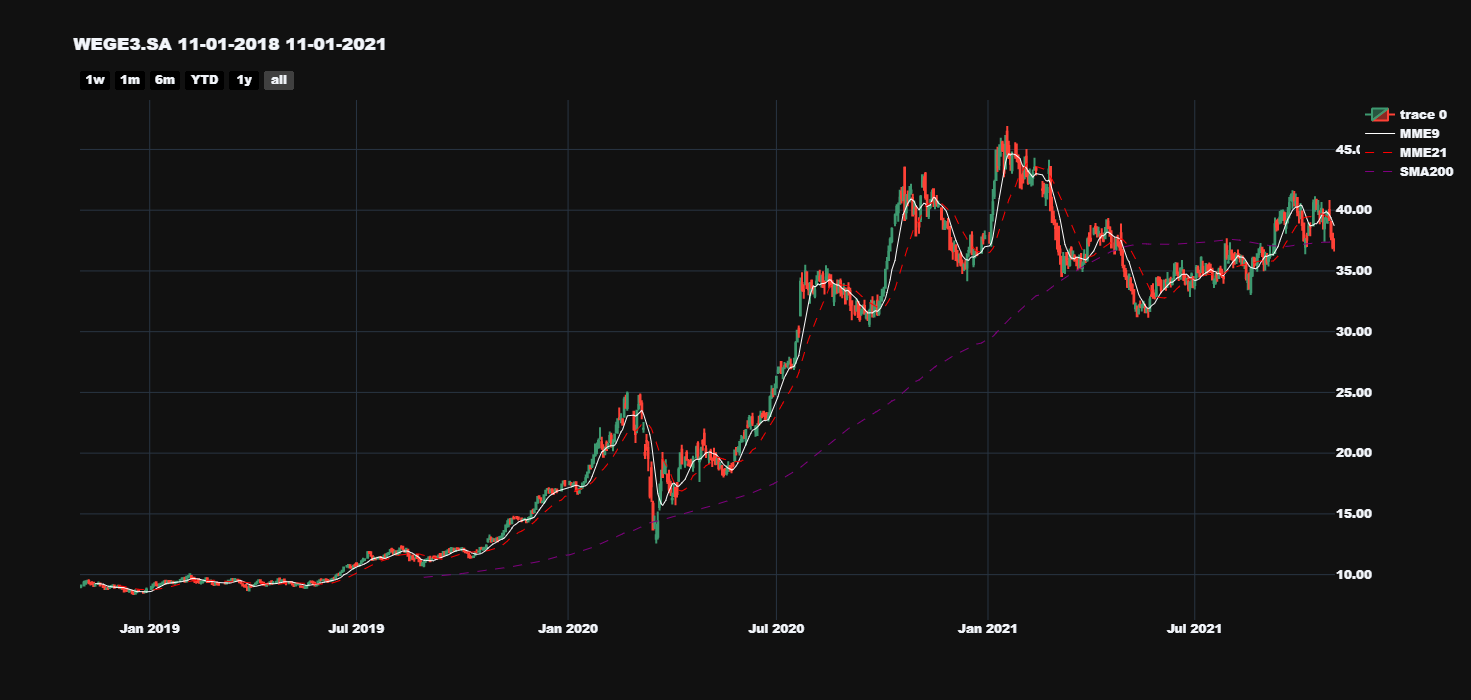

Text(value='', placeholder='Search Tickers')

Button(description='Load Charts', style=ButtonStyle())

In [1]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
from ipywidgets import widgets

import plotly.graph_objects as go
from plotly.offline import plot

import pandas as pd
from pandas_datareader import data as web 


from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta

text = widgets.Text(placeholder='Search Tickers', width=500)


def getEndDate(tipo, quantidade):
    
    if(tipo.lower()=="m"):
        data_fim = datetime.today() - relativedelta(months=int(quantidade))      
    

    return data_fim.strftime('%m-%d-%Y')

def getData(acao,start, end):
    try:
        df = web.DataReader(f'{acao}', data_source='yahoo', start=start, end=end)

        df.reset_index(inplace=True,drop=False)

        df['MA9'] = df.Close.rolling(9).mean()
        df['MA21'] = df.Close.rolling(21).mean()
        df['MA200'] = df.Close.rolling(200).mean()

        df["MME9"] = df["Adj Close"].ewm(span=9, min_periods=9).mean()
        df["MME21"] = df["Adj Close"].ewm(span=21, min_periods=21).mean()
        return df
    except:
        print(f'Couldn\'t find historical for {acao} from {start} to {end})')

#    display(df)
    
    
    

def plotaCandleStickPlotLy(acao, start, end):
        
        df = getData(acao, start, end)
        
    
        fig = go.FigureWidget(data=[go.Candlestick(x=df['Date'],
                        open=df['Open'],
                        high=df['High'],
                        low=df['Low'],
                        close=df['Close']),
                        go.Scatter(name="MME9", x=df.Date, y=df.MA9, line=dict(color='white', width=1 )),
                        go.Scatter(name="MME21",x=df.Date, y=df.MA21, line=dict(color='red', width=1, dash="dash")),
                        go.Scatter(name="SMA200",x=df.Date, y=df.MA200, line=dict(color='purple', width=1, dash="dash"))
                             ]                       
                       )
        
        fig.update_xaxes(
            rangebreaks=[
                dict(bounds=["sat", "mon"]), #hide weekends                
            ]
        )
        
        fig.update_layout(
            xaxis=dict(
                rangeselector=dict(
                    bgcolor= 'black',
                    buttons=list([
                         dict(count=7,
                             label="1w",
                             step="day",
                             stepmode="backward"
                             ),
                        dict(count=1,
                             label="1m",
                             step="month",
                             stepmode="backward"),
                        dict(count=6,
                             label="6m",
                             step="month",
                             stepmode="backward"),
                        dict(count=1,
                             label="YTD",
                             step="year",
                             stepmode="todate"),
                        dict(count=1,
                             label="1y",
                             step="year",
                             stepmode="backward"),
                        dict(step="all")
                    ])
                ),
                rangeslider=dict(
                    visible= False 
                ),
                type="date"
            ),
#             paper_bgcolor="LightSteelBlue",
            height=700,
#             font_color="navy",  
            template="plotly_dark",
            title=f'{acao} {start} {end}',
            font_family="Arial Black",                      
            legend_title_font_color="green",
            yaxis = dict(fixedrange = False,autorange= True, side="right", tickformat = ".2f"),         
        )
     
        fig.update_layout(hoverdistance=10)
        fig.update_layout(hovermode="x")
        
        
        fig.show()
        
def clearOutput():
    
    for i in range(10):
        clear_output(wait=True)
    
    showForm()

def expandeJupyter():
    display(HTML("<style>.container { width:100% !important; }</style>"))
        
def showForm():
    expandeJupyter()
    
    # displaying the text widget
    
    display(text)

    # add button that updates the graph based on the checkboxes
    button = widgets.Button(description="Load Charts")
    button.on_click(on_button_clicked)
    display(button)
        
# function to deal with the checkbox update button       
def on_button_clicked(b):
    clearOutput()
    tickers = text.value
    tickers = tickers.replace("\n","")
    tickers = tickers.replace(" ","")
    plotCharts(tickers)
        
def plotCharts(tickers):
    end = date.today().strftime('%m-%d-%Y')

    start = getEndDate("m", 36)

    stocks = tickers.split(sep=";")

    for stock in stocks:
        try:
            if(stock != ""):
                plotaCandleStickPlotLy(stock, start, end)
        except Exception as exc:
            print(exc)
            
expandeJupyter()
plotCharts("ABEV3.SA;EGIE3.SA;FLRY3.SA;TOTS3.SA;WEGE3.SA")
showForm()
